# Python_Machine Learning_Pandas_Data Analysis - part 4

##### 데이터 분석 관련 내용을 정리 하였으며, 파이썬 머신러닝 판다스 데이터분석(오승환 지음)을 참고하여 작성하였습니다.
##### 해당 자료는 python 3.7 기반으로 작성되었습니다.

## 4. 시각화 도구
### 4.1 Matplotlib - 기본 그래프 도구
#### 4.1.1 선 그래프

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 한글 폰트 깨짐 방지
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


df = pd.read_excel(os.path.join(os.getcwd(), '시도별 전출입 인구수.xlsx'), header = 0)
df = df.fillna(method = 'ffill')
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

print(df_seoul.head())
print("--------------------------------------------------------")

sr_one = df_seoul.loc['경기도']
print(sr_one.head())
print("--------------------------------------------------------")

          1970     1971     1972     1973     1974     1975     1976     1977  \
전입지                                                                             
전국     1448985  1419016  1210559  1647268  1819660  2937093  2495620  2678007   
부산광역시    11568    11130    11768    16307    22220    27515    23732    27213   
대구광역시        -        -        -        -        -        -        -        -   
인천광역시        -        -        -        -        -        -        -        -   
광주광역시        -        -        -        -        -        -        -        -   

          1978     1979  ...     2008     2009     2010     2011     2012  \
전입지                      ...                                                
전국     3028911  2441242  ...  2083352  1925452  1848038  1834806  1658928   
부산광역시    29856    28542  ...    17353    17738    17418    18816    16135   
대구광역시        -        -  ...     9720    10464    10277    10397    10135   
인천광역시        -        -  ...    50493    45392 

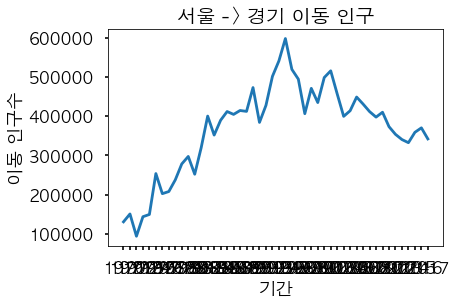

In [32]:
# plt.plot() - 선 그래프
plt.plot(sr_one.index, sr_one.values)

# plt.title - 차트 제목 추가
plt.title('서울 -> 경기 이동 인구')

# plt.xlabel / plt.ylabel - x축, y축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# plt.show() - 변경사항 저장 후 출력
plt.show()

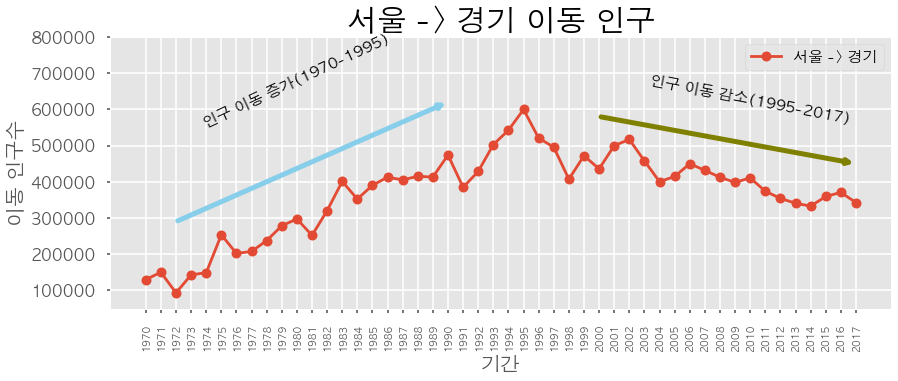

In [33]:
# plt.style.use() - 스타일 서식 지정
plt.style.use('ggplot')

# plt.figure() - 그림 사이즈 지정
plt.figure(figsize = (14,5))

# plt.xticks() - x축 눈금 라벨 회전하기 / ratation - 각도, size - 폰트 크기
plt.xticks(rotation = 'vertical', size = 10)

# plt.plot() - 선 그래프 / marker - 마커 모양, markersize - 마커크기
plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10)

# plt.title - 차트 제목 추가
plt.title('서울 -> 경기 이동 인구', size = 30)

# plt.xlabel / plt.ylabel - x축, y축 이름 추가
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)

#plt.legend() - 범례 표시
plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15)

# plt.ylim() - y축 범위지정(최소값, 최대값)
plt.ylim(50000, 800000)

# plt.annotate - 주석표시(화살표)
plt.annotate('', xy=(20, 620000), # 화살표의 머리 부분(끝점)
            xytext = (2, 290000), # 화살표의 꼬리 부분(시작점)
            xycoords = 'data', # 좌표체계
            arrowprops = dict(arrowstyle='->', color = 'skyblue', lw=5) # 화살표 서식
            )

plt.annotate('', xy=(47, 450000), # 화살표의 머리 부분(끝점)
            xytext = (30, 580000), # 화살표의 꼬리 부분(시작점)
            xycoords = 'data', # 좌표체계
            arrowprops = dict(arrowstyle='->', color = 'olive', lw=5) # 화살표 서식
            )

# plt.annotate - 주석표시(텍스트)
plt.annotate('인구 이동 증가(1970-1995)', # 텍스트 입력
            xy=(10, 550000), # 텍스트 위치 기준점
            rotation = 25, # 텍스트 회전 각도
            va = 'baseline', # 텍스트 상하 정렬
            ha = 'center', # 텍스트 좌우 정렬
            fontsize = 15 # 텍스트 크기
            )

plt.annotate('인구 이동 감소(1995-2017)', # 텍스트 입력
            xy=(40, 560000), # 텍스트 위치 기준점
            rotation = -11, # 텍스트 회전 각도
            va = 'baseline', # 텍스트 상하 정렬
            ha = 'center', # 텍스트 좌우 정렬
            fontsize = 15 # 텍스트 크기
            )

# plt.show() - 변경사항 저장 후 출력
plt.show()

/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


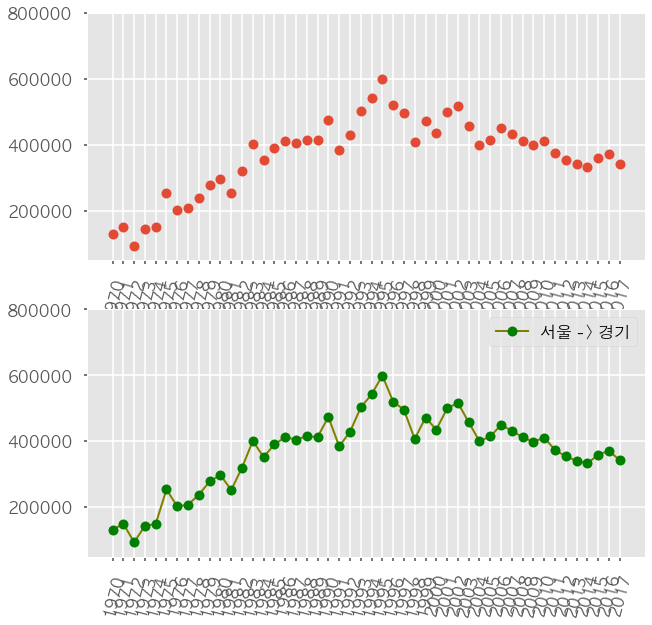

In [34]:
# plt.figure() & figure.add_subplot() - 그래프 객체 생성(figure에 2개의 서브플롯 생성)
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize = 10)
ax2.plot(sr_one, marker = 'o', markerfacecolor = 'green', markersize = 10, 
        color = 'olive', linewidth=2, label = '서울 -> 경기')
ax2.legend(loc = 'best')

# ax.set_ylim - y축 범위 지정
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# ax.set_xticklabels - 축 눈금 라벨 지정 및 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

# ax.set_title - 제목 추가
# ax2.set_title('서울 -> 경기 인구 이동', size = 20)

plt.show()

#### 4.1.2 면적 그래프
#### - 면적 그래프는 선 그래프를 그리는 plot()에 kind = 'area' 옵션을 추가하여 간단하게 그릴 수 있다. 
#### - 그래프를 누적할 지 여부를 설정할 수 있는 데 stacked = 'True' 옵션을 활용한다. 

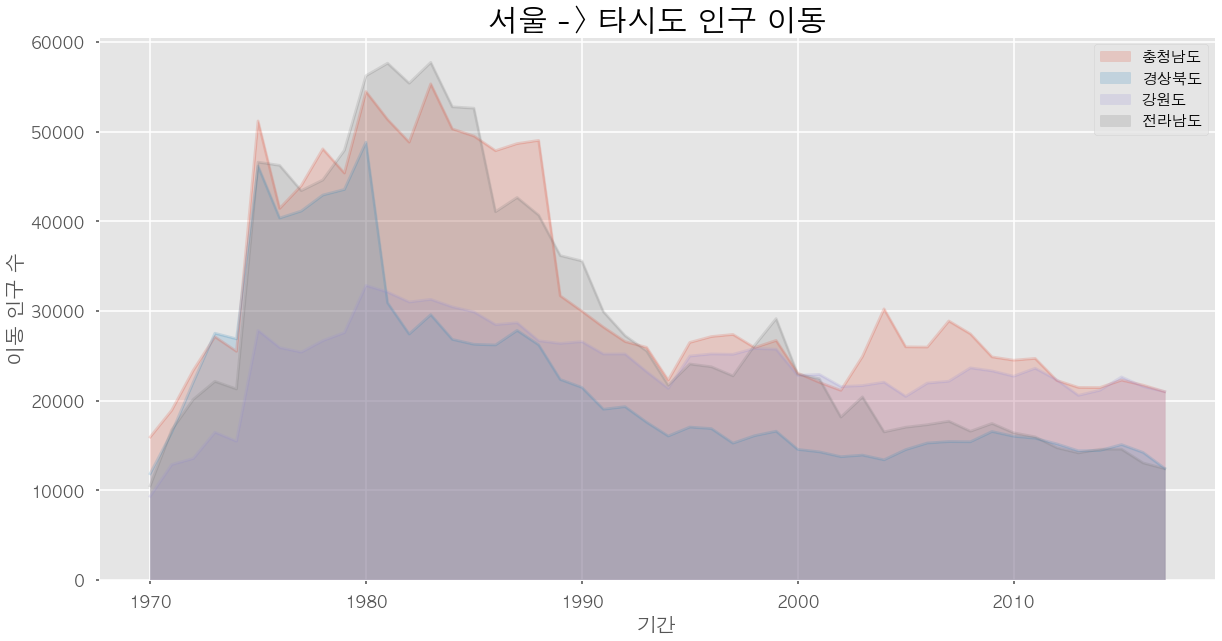

In [35]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도' ,'경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use("ggplot")

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind = 'area', stacked = False, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

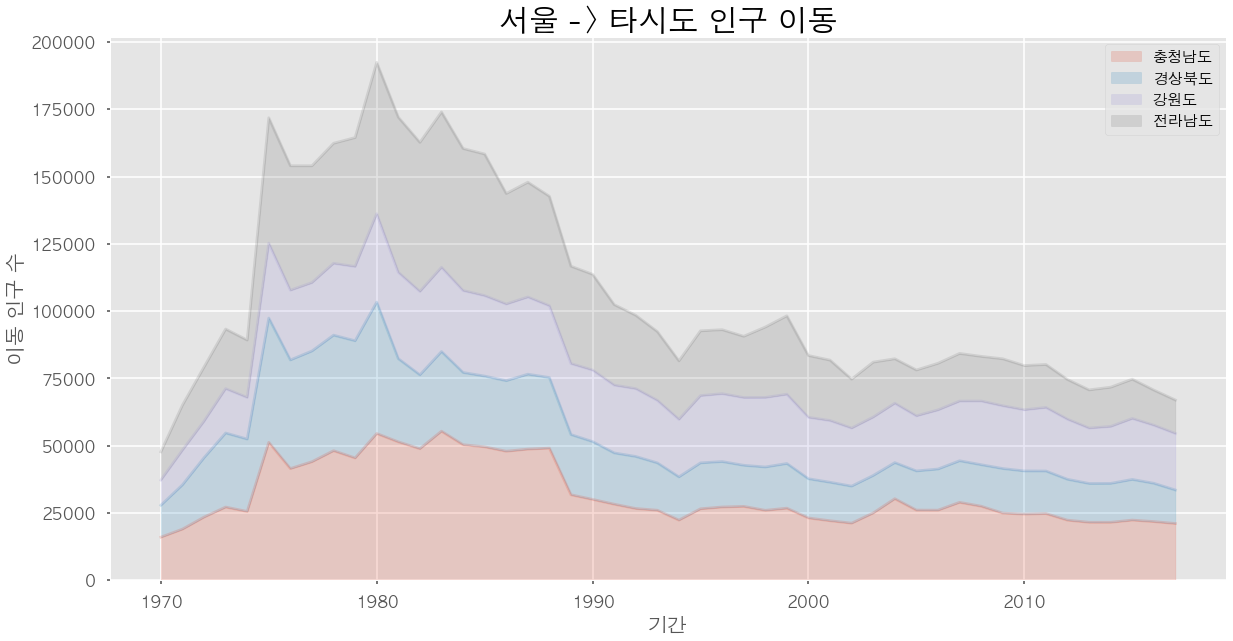

In [36]:
# stacked = 'True' 옵션
df_4.plot(kind = 'area', stacked = True, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>
--------------------------------------------


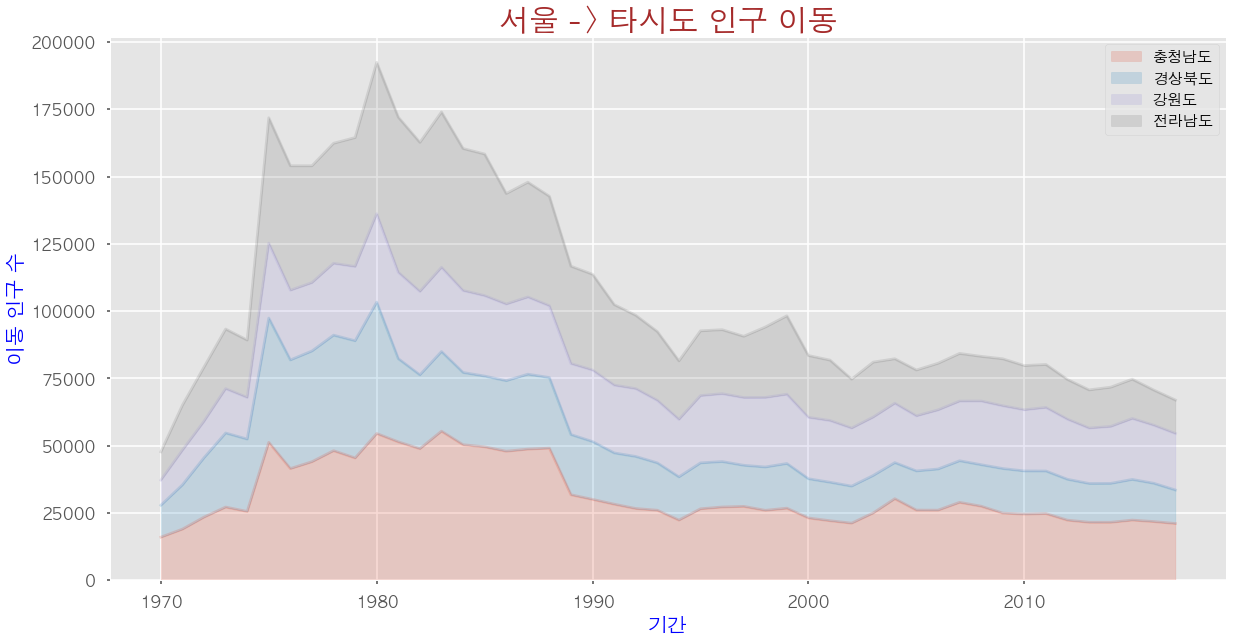

In [37]:
# axe 객체를 활용하여 제목, 축 이름 등을 설정
ax = df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize =(20,10))
print(type(ax))
print("--------------------------------------------")

ax.set_title("서울 -> 타시도 인구 이동", size = 30, color = 'brown', weight = 'bold')
ax.set_ylabel('이동 인구 수', size=20, color = 'blue')
ax.set_xlabel('기간', size=20, color = 'blue')
ax.legend(loc ='best', fontsize = 15)

plt.show()

#### 4.1.3 막대 그래프
#### - 세로형 막대 그래프는 시간적으로 차이가 나는 두 점에서 데이터 값의 차이를 잘 설명, 시계열 자료에 적합
#### - 가로형 막대 그래프는 각 변수 사이 값의 크기 차이를 설명하는 데 적합

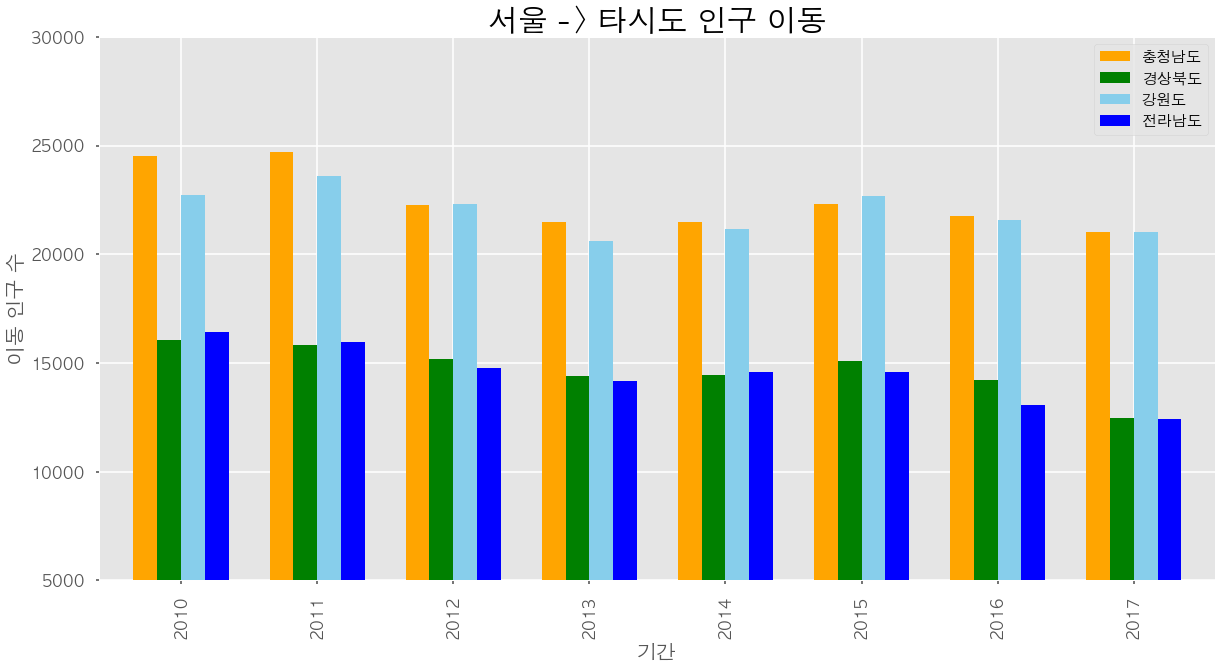

In [38]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도' ,'경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()


plt.style.use("ggplot")

df_4.index = df_4.index.map(int)

df_4.plot(kind = 'bar', figsize = (20,10), width=0.7, color = ['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.ylim(5000, 30000)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

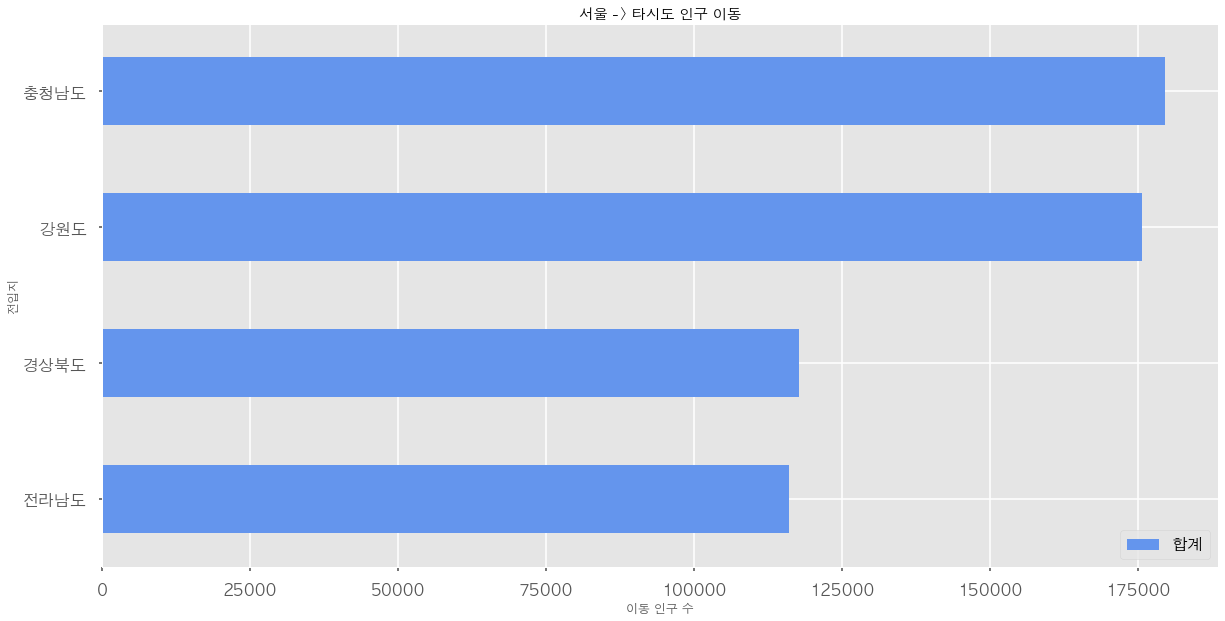

In [39]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도' ,'경상북도', '강원도', '전라남도'], col_years]
df_4['합계'] = df_4.sum(axis = 1)

df_total = df_4[['합계']].sort_values(by='합계', ascending = True)

plt.style.use("ggplot")

df_total.plot(kind = 'barh', figsize = (20,10), width=0.5, color = 'cornflowerblue')

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

#### 4.1.4 히스토그램
#### -  단변수 데이터의 빈도수를 그래프로 표현한 것이 히스토그램이다.

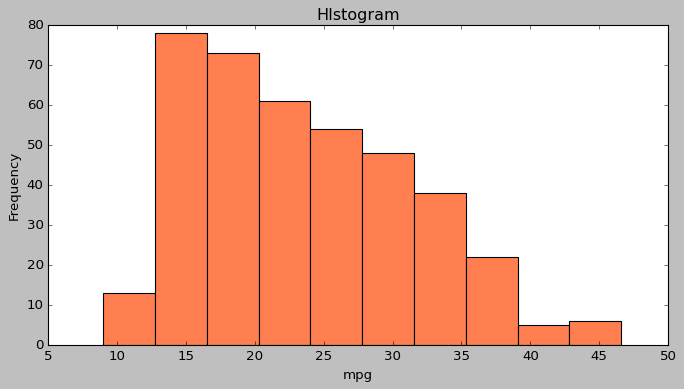

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')

df = pd.read_csv('auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# mpg 열에 대한 히스토그램
df['mpg'].plot(kind = 'hist', bins=10, color = 'coral', figsize=(10,5))

plt.title("HIstogram")
plt.xlabel('mpg')
plt.show()

#### 4.1.5 산점도
#### - 서로 다른 두 변수 사이의 관계를 표현
#### - 선 그래프를 그릴 때 plot() 메서드에 'o' 옵션을 사용하면 선 없이 점으로만 표현되어 사실상 산점도로 볼 수 있음

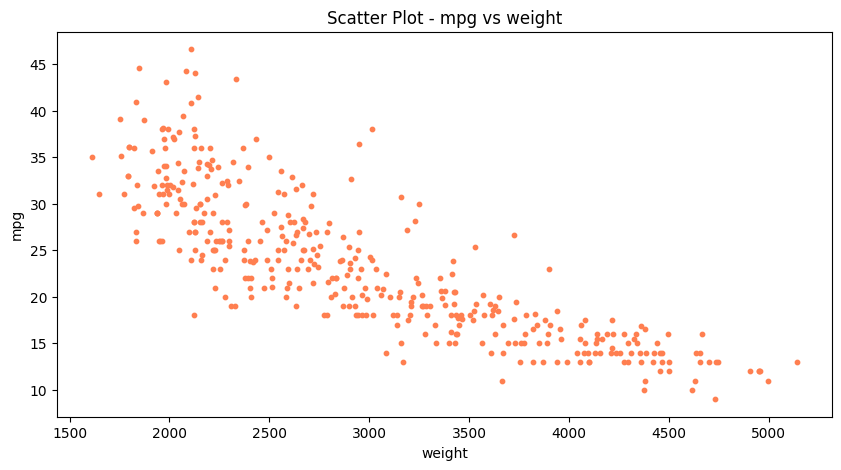

In [41]:
plt.style.use('default')

df = pd.read_csv('auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

df.plot(kind = 'scatter', x='weight', y='mpg', s=10, color = 'coral', figsize=(10,5))

plt.title('Scatter Plot - mpg vs weight')
plt.show()

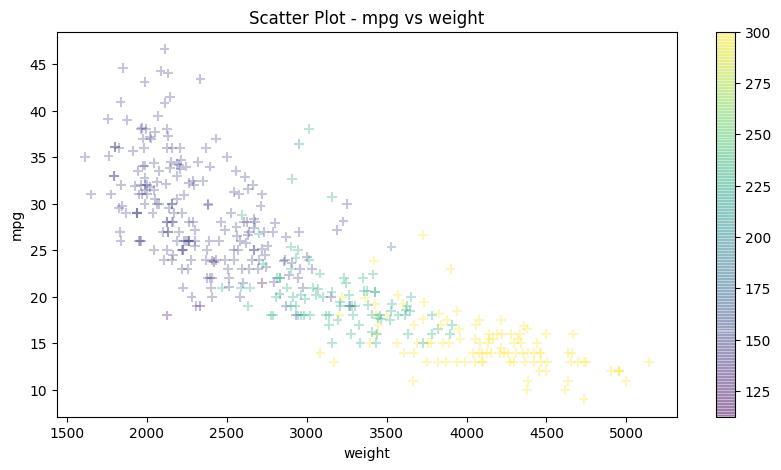

In [42]:
# 3개 변수로 산점도 그리기 - 버블차트
cylinders_size = df.cylinders/df.cylinders.max() * 300
df.plot(kind = 'scatter', x='weight', y='mpg', c=cylinders_size, 
        marker = '+', cmap = 'viridis', s = 50, figsize=(10,5), alpha=0.3)

plt.title('Scatter Plot - mpg vs weight')

# savefig를 사용하여 그림 파일로 저장
# plt.savefig("scatter.png")

plt.show()

#### 4.1.6 파이 차트

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  
-----------------------------------------------------


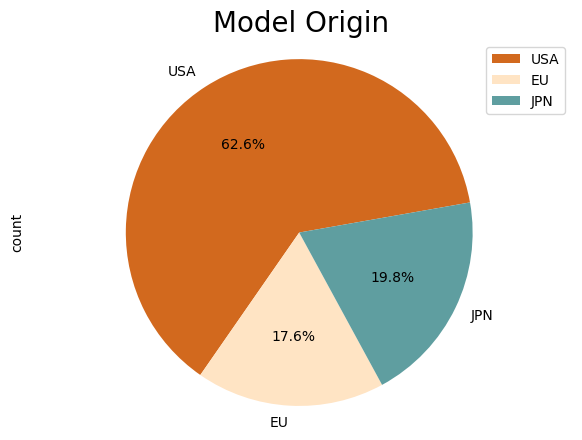

In [43]:
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin.head())
print("-----------------------------------------------------")

df_origin.index = ['USA', 'EU', 'JPN']

# 파이차트 그리기
df_origin['count'].plot(kind = 'pie', figsize=(7,5), autopct="%1.1f%%", startangle = 10, 
                       colors = ['chocolate', 'bisque', 'cadetblue'])

plt.title('Model Origin', size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

#### 4.1.7 박스 플롯

/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/matp

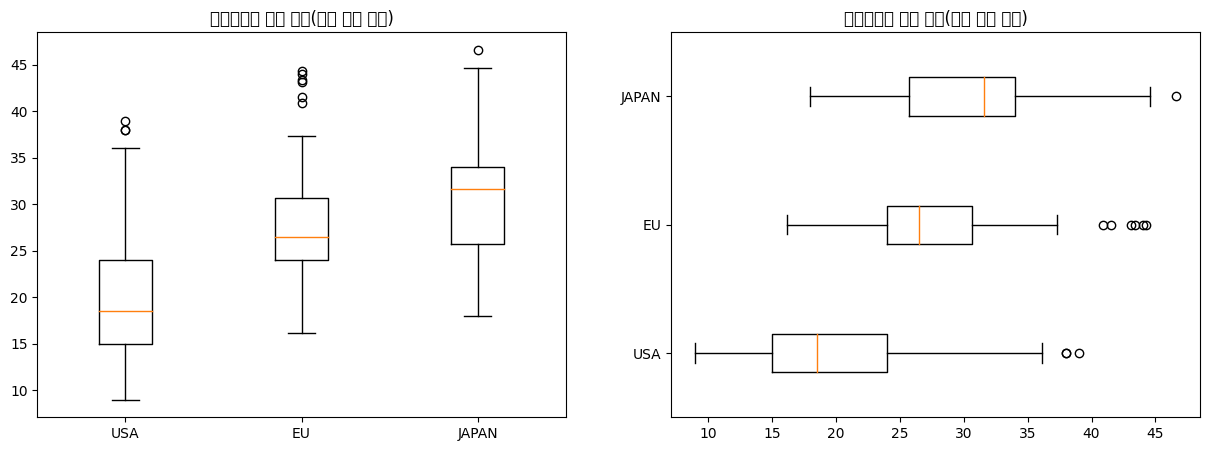

In [45]:
plt.style.use('default')

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
                df[df['origin']==2]['mpg'],
                  df[df['origin']==3]['mpg']],
              labels = ['USA','EU','JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
                df[df['origin']==2]['mpg'],
                  df[df['origin']==3]['mpg']],
              labels=['USA','EU','JAPAN'],
           vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

### 4.2 Seaborn 라이브러리 - 고급 그래프 도구

In [47]:
import seaborn as sns

# sns 내장 데이터인 titanic 사용
titanic = sns.load_dataset('titanic')
print(titanic.head())
print('------------------------------------------------------')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------     

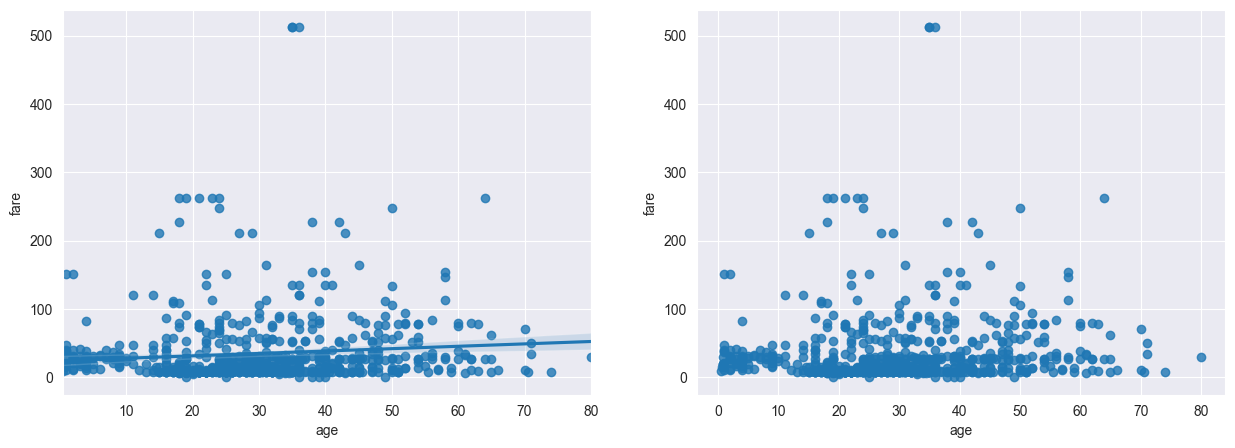

In [49]:
# sns.regplot() - 회귀선이 있는 산점도
sns.set_style('darkgrid')

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'age', y='fare', data = titanic, ax = ax1)

sns.regplot(x = 'age', y = 'fare', data = titanic, ax = ax2, fit_reg=False)

plt.show()

/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


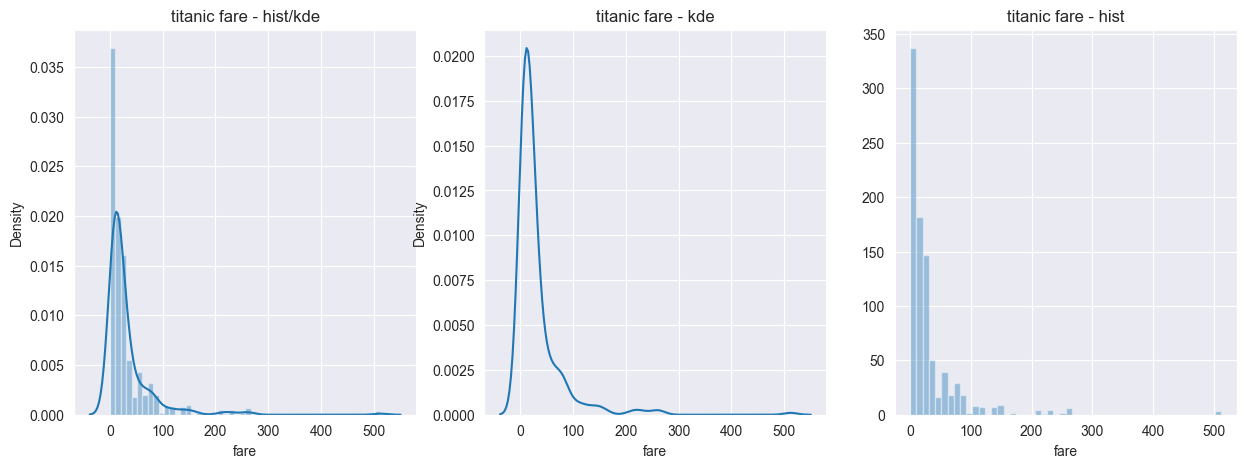

In [51]:
# distplot() - 히스토그램 / 커널 밀도 함수(그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 함수)
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# default
sns.distplot(titanic['fare'], ax = ax1)

# hist = False
sns.distplot(titanic['fare'], ax = ax2, hist = False)

# kde = False
sns.distplot(titanic['fare'], ax = ax3, kde = False)

ax1.set_title('titanic fare - hist/kde')
ax2.set_title('titanic fare - kde')
ax3.set_title('titanic fare - hist')

plt.show()

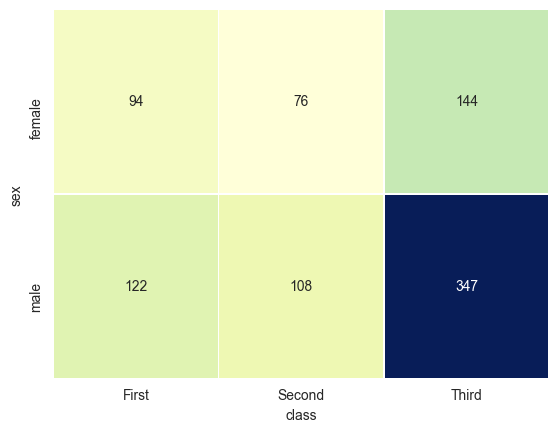

In [52]:
# heatmap() - 히트맵
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu', linewidth=.5, cbar = False)

plt.show()

/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


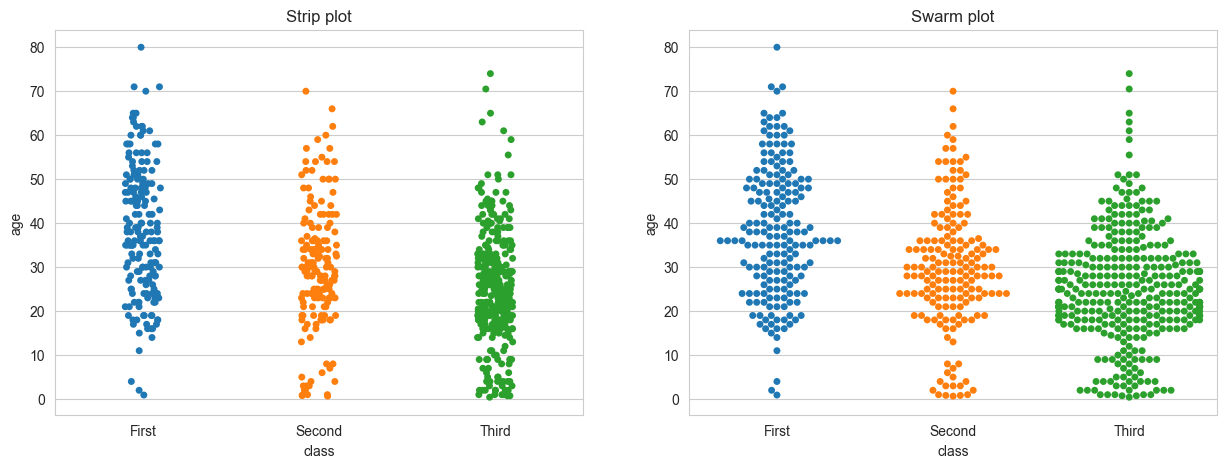

In [54]:
# stripplot() - 범주형 데이터의 산점도 / swarmplot() - 데이터의 분산까지 고려

# style 5가지 - darkgrid, whitegrid, dark, white, ticks
sns.set_style('whitegrid')

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x='class', y='age', data = titanic, ax=ax1)

sns.swarmplot(x='class', y='age', data = titanic, ax=ax2)

ax1.set_title('Strip plot')
ax2.set_title('Swarm plot')

plt.show()

Text(0.5, 1.0, 'titanic survived - sex/class(stacked)')

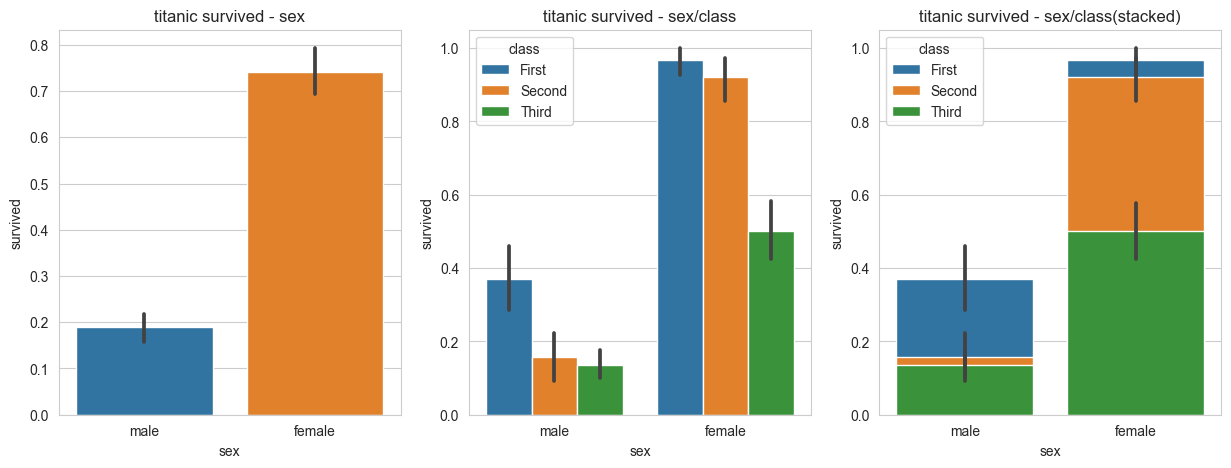

In [55]:
# barplot() - 막대 그래프
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', hue = 'class', data=titanic, ax=ax2)
sns.barplot(x='sex', y='survived', hue = 'class', dodge = False, data=titanic, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

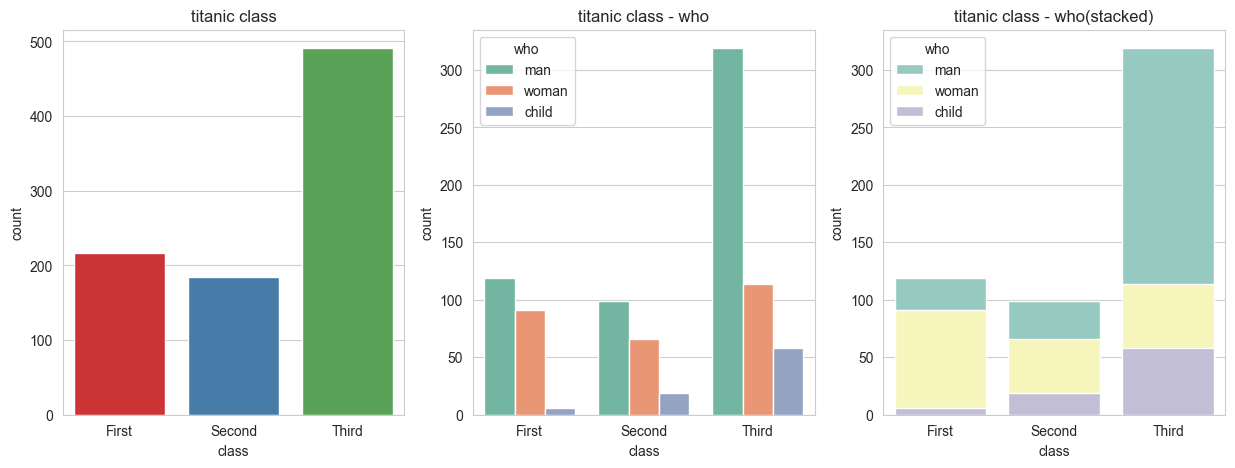

In [56]:
# countplot() - 빈도 그래프
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class', palette='Set1', data=titanic, ax = ax1)
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax = ax2)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax = ax3)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

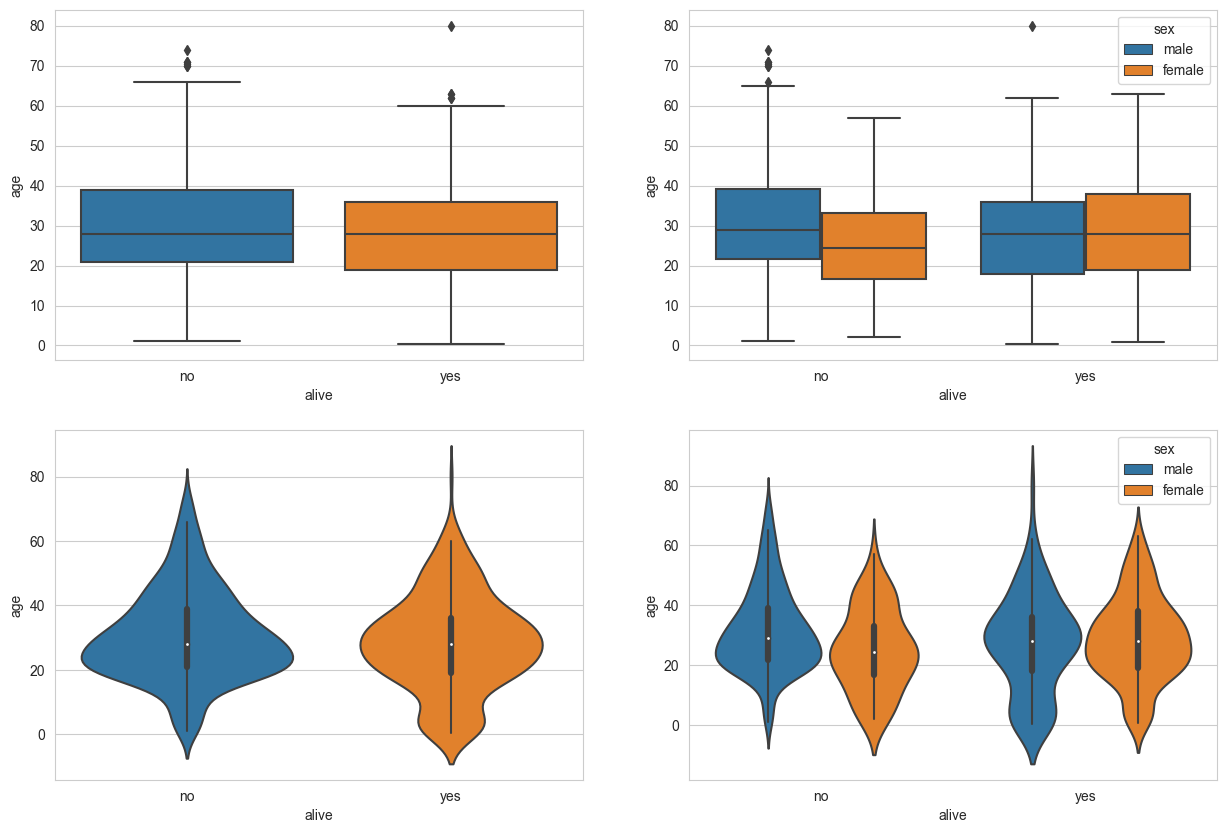

In [57]:
# boxplot() - 박스 플롯 / violinplot() - 바이올린 플롯(커널 밀도 함수 y축 방향에 추가)

fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age', data = titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data = titanic, ax=ax2)
sns.violinplot(x='alive', y='age', data = titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue='sex', data = titanic, ax=ax4)

plt.show()


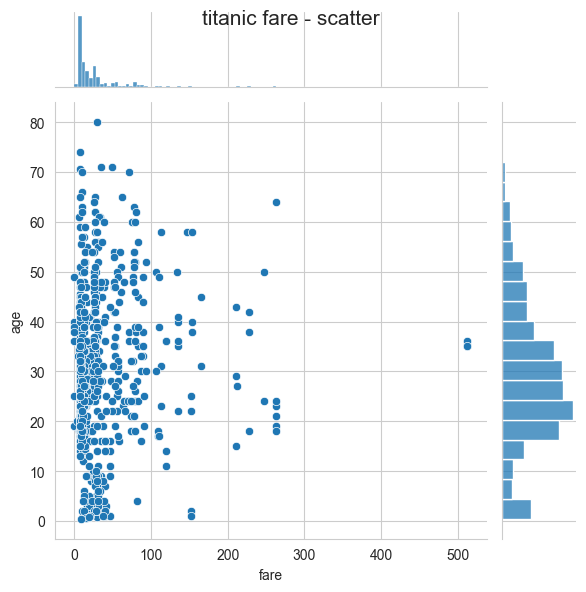

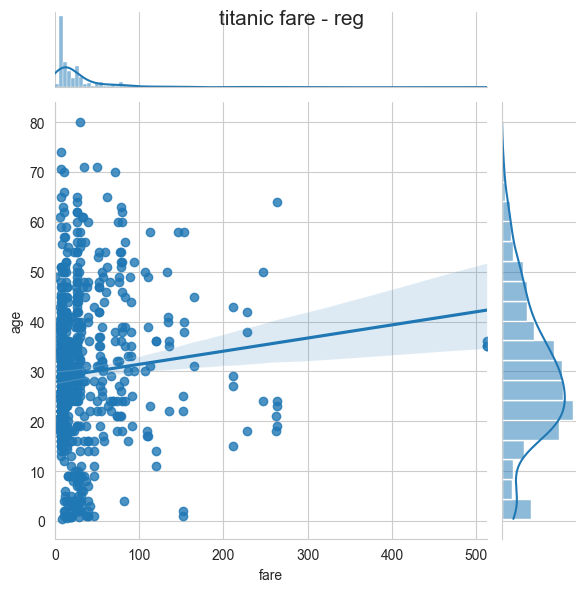

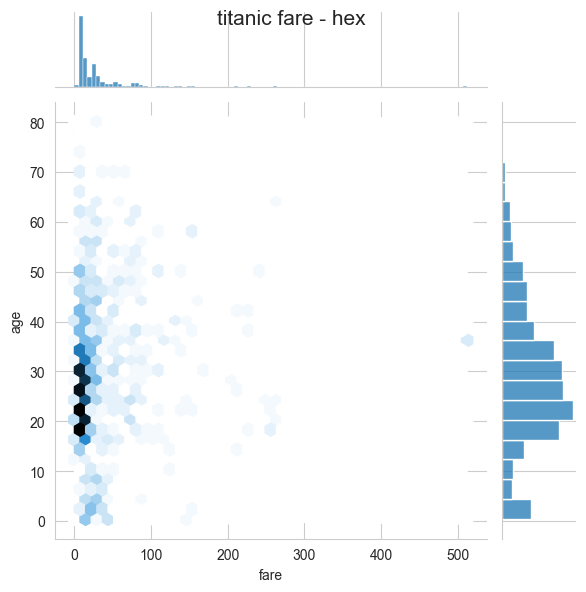

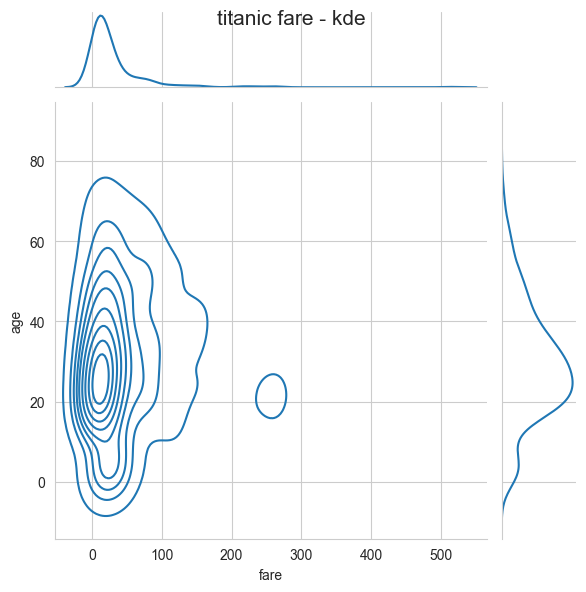

In [58]:
# jointplot() - 조인트 그래프(산점도 기본 표시 + 축에 각 변수에 대한 히스토그램)

sns.set_style('whitegrid')

j1 = sns.jointplot(x='fare', y='age', data = titanic)
j2 = sns.jointplot(x='fare', y='age', kind = 'reg', data = titanic)
j3 = sns.jointplot(x='fare', y='age', kind = 'hex', data = titanic)
j4 = sns.jointplot(x='fare', y='age', kind = 'kde', data = titanic)

j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

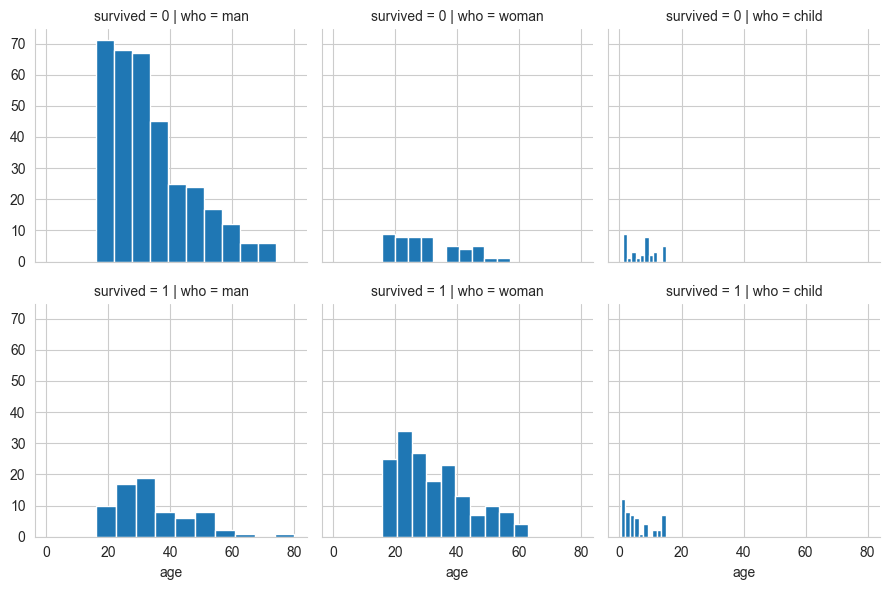

In [59]:
# FacetGrid() - 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯 생성

sns.set_style('whitegrid')

g = sns.FacetGrid(data = titanic, col='who', row='survived')

g = g.map(plt.hist, 'age')

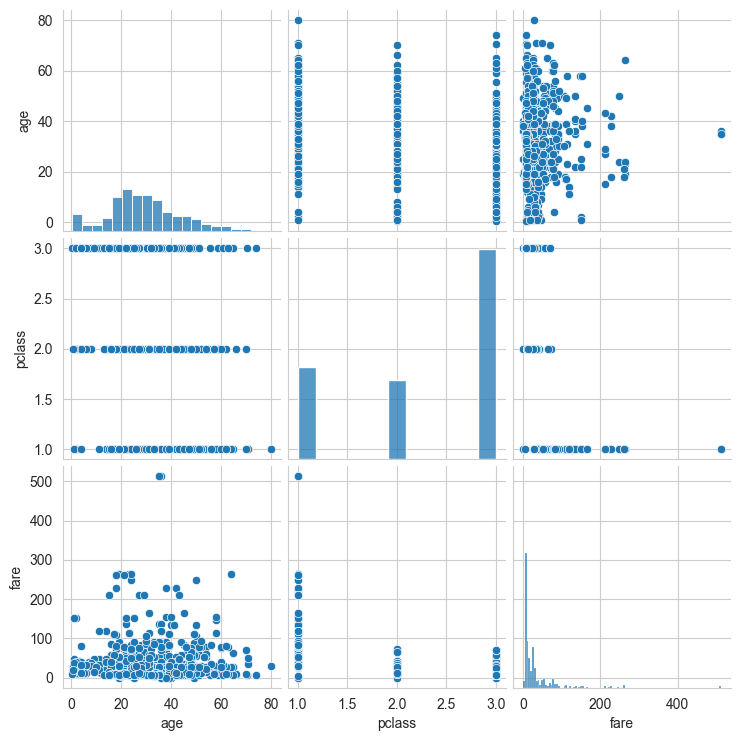

In [61]:
# pairplot() - 이변수 데이터의 분포

titanic_pair = titanic[['age', 'pclass', 'fare']]

g = sns.pairplot(titanic_pair)

### 4.3 Folium 라이브러리 - 지도 활용
#### - 해당 라이브러리는 활용도가 높지 않을 것 같아 따로 정리하지 않겠다